<a href="https://colab.research.google.com/github/SaurabhP91/Symptom-classifier/blob/main/AIminimodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.

{'Emotional pain': 0, 'Hair falling out': 1, 'Heart hurts': 2, 'Infected wound': 3, 'Foot ache': 4, 'Shoulder pain': 5, 'Injury from sports': 6, 'Skin issue': 7, 'Stomach ache': 8, 'Knee pain': 9, 'Joint pain': 10, 'Hard to breath': 11, 'Head ache': 12, 'Body feels weak': 13, 'Feeling dizzy': 14, 'Back pain': 15, 'Open wound': 16, 'Internal pain': 17, 'Blurry vision': 18, 'Acne': 19, 'Muscle pain': 20, 'Neck pain': 21, 'Cough': 22, 'Ear ache': 23, 'Feeling cold': 24}

Training Accuracy Score: 99.8%
Validation Accuracy Score: 99.5%


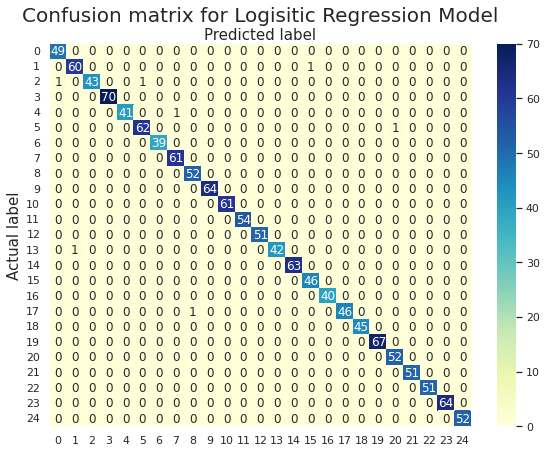

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.98      0.98      0.98        61
           2       1.00      0.96      0.98        45
           3       1.00      1.00      1.00        70
           4       1.00      0.98      0.99        42
           5       0.98      0.98      0.98        63
           6       1.00      1.00      1.00        39
           7       0.98      1.00      0.99        61
           8       0.98      1.00      0.99        52
           9       1.00      1.00      1.00        64
          10       1.00      1.00      1.00        61
          11       1.00      1.00      1.00        54
          12       1.00      1.00      1.00        51
          13       1.00      0.98      0.99        43
          14       1.00      1.00      1.00        63
          15       0.98      1.00      0.99        46
          16       1.00      1.00      1.00        40
          17       1.00    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import pickle
import string
import spacy
import nltk 
import re
import sklearn


from sklearn.ensemble import *
from nltk.stem import WordNetLemmatizer 
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
nltk.download('punkt')
nltk.download('wordnet')

#nltk.download('stopwords') 
#nltk.download('wordnet')
sns.set(style='whitegrid')

warnings.filterwarnings('ignore')

def clean_txt(docs):
    lemmatizer = WordNetLemmatizer() 

    # split into words
    speech_words = nltk.word_tokenize(docs)
    # convert to lower case
    lower_text = [w.lower() for w in speech_words]
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    stripped = [re_punc.sub('', w) for w in lower_text]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in  list(STOP_WORDS)]
    #Stemm all the words in the sentence
    lem_words = [lemmatizer.lemmatize(word) for word in words]
    combined_text = ' '.join(lem_words)
    return combined_text

def classification_metrics(model, y_test, y_pred):
    print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
    print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    fig,ax = plt.subplots(figsize=(8,6))
    sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion matrix for Logisitic Regression Model', fontsize=20, y=1.1)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    print(classification_report(y_test, y_pred))

def save_model(model,filename):
    pickle.dump(model, open(filename, 'wb'))

df = pd.read_csv('overview-of-recordings.csv')
df_text = df[['phrase', 'prompt']]


df_text['phrase'] = df_text['phrase'].apply(clean_txt)


X = df['phrase']
y = df['prompt']

vec = TfidfVectorizer()

X = vec.fit_transform(X).toarray()


prompt = df_text["prompt"].unique()
prompt_dict = {value:index for index, value in enumerate(prompt)}
results = df_text["prompt"].map(prompt_dict)
print(f'\n{prompt_dict}\n')


X_train, X_test, y_train, y_test = train_test_split(X, results, test_size=0.2, random_state=0)

text_clf = BaggingClassifier(n_estimators=10)
model = text_clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
classification_metrics(model, y_test, y_pred)

save_model(model, 'model.pkl')

save_model(vec, 'vectorizer.pkl')


def detectAilment(text):
    pred = [text]

    transform_vect =vec.transform(pred).toarray()
    if model.predict(transform_vect) == 0:
        print("Emotional pain")
    elif model.predict(transform_vect) == 1:
        print("Hair falling out")
    elif model.predict(transform_vect) == 2:
        print("Heart hurts")
    elif model.predict(transform_vect) == 3:
        print("Infected wound")
    elif model.predict(transform_vect) == 4:
        print("Foot ache")
    elif model.predict(transform_vect) == 5:
        print("Shoulder pain")
    elif model.predict(transform_vect) == 6:
        print("Injury from sports")
    elif model.predict(transform_vect) == 7:
        print("Skin issue")
    elif model.predict(transform_vect) == 8:
        print("Stomach ache")
    elif model.predict(transform_vect) == 9:
        print("Knee pain")
    elif model.predict(transform_vect) == 10:
        print("Joint pain")
    elif model.predict(transform_vect) == 11:
        print("Hard to breath")
    elif model.predict(transform_vect) == 12:
        print("Head ache")
    elif model.predict(transform_vect) == 13:
        print("Body feels weak")
    elif model.predict(transform_vect) == 14:
        print("Feeling Dizzy")
    elif model.predict(transform_vect) == 15:
        print("Back pain")
    elif model.predict(transform_vect) == 16:
        print("Open wound")
    elif model.predict(transform_vect) == 17:
        print("Internal pain")
    elif model.predict(transform_vect) == 18:
        print("Blurry vision")
    elif model.predict(transform_vect) == 19:
        print("Acne")
    elif model.predict(transform_vect) == 20:
        print("Muscle pain")
    elif model.predict(transform_vect) == 21:
        print("Neck pain")
    elif model.predict(transform_vect) == 22:
        print("Cough")
    elif model.predict(transform_vect) == 23:
        print("Ear ache")
        
    else:
        print("Feeling cold")

while True:
    value = input('How are you feeling right now?: ')
    try:
        detectAilment(value)
    except ValueError:
       print ('Invalid')
       continue